<a href="https://colab.research.google.com/github/pranshurastogi29/how-effective-are-std-drugs/blob/master/STD_AI_Data_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/train.csv')
df = df.drop(columns=['drug_approved_by_UIC','patient_id'])
df1 = pd.read_csv('/content/drive/My Drive/test.csv')
df.head()

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,8.022969
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,7.858458
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,6.341969
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,6.590176
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,43,6.144782


In [0]:
df.describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


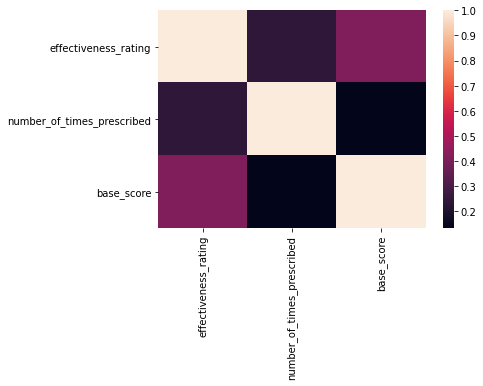

In [0]:
sns.heatmap(df.corr())

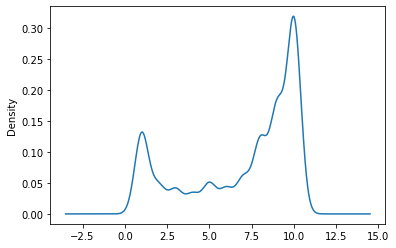

In [0]:
df.effectiveness_rating.plot.kde()

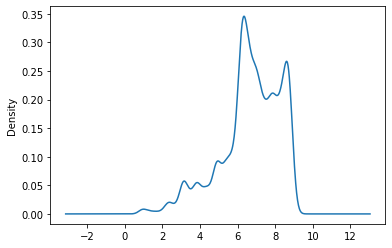

In [0]:
df.base_score.plot.kde()


 mu = 6.66 and sigma = 1.59



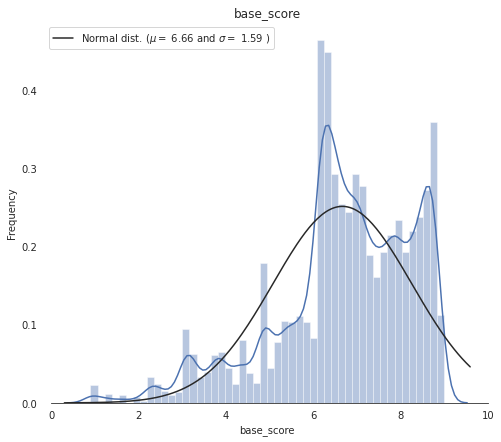

In [0]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['base_score'], fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['base_score'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="base_score")
ax.set(title="base_score")
sns.despine(trim=True, left=True)

plt.show()

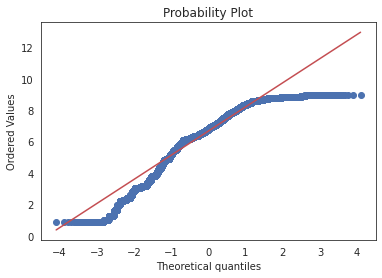

In [0]:
from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
res = stats.probplot(df['base_score'], plot=plt)
plt.show()

Automatically created module for IPython interactive environment


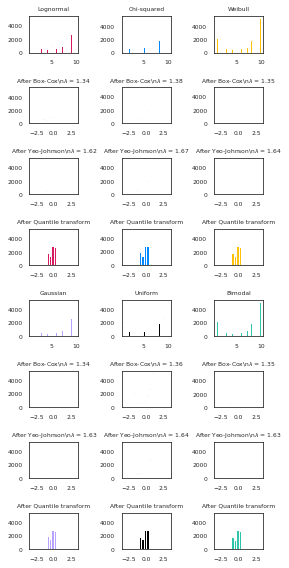

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

print(__doc__)


N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
f = 3
X_chisq = rng.chisquare(df=f, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

colors = ['#D81B60', '#0188FF', '#FFC107',
          '#B7A2FF', '#000000', '#2EC5AC']

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X = df.effectiveness_rating.values.reshape(-1,1)
    X_train, X_test = train_test_split(X, test_size=.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

this is done

 mu = -0.00 and sigma = 1.02



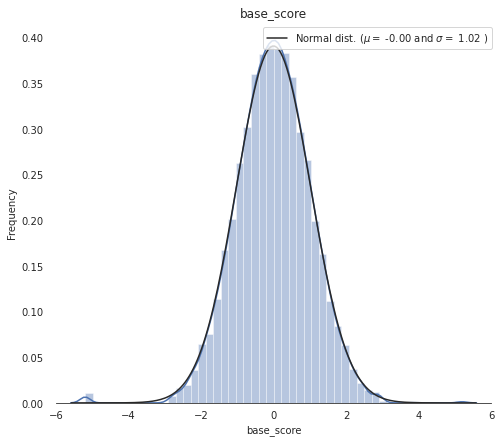

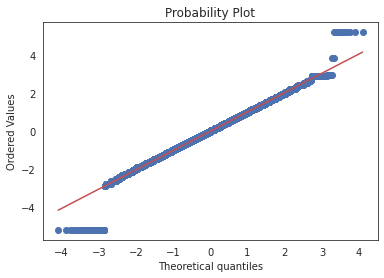


Chi-squared statistic = 1016.653, p = 0.000

The transformed data does not look Gaussian (reject the null hypothesis)


In [0]:
from sklearn.preprocessing import  PowerTransformer,QuantileTransformer
rng = np.random.RandomState(24546)
qt =  PowerTransformer()
X = df.base_score.values.reshape(-1,1)
#X = qt.fit_transform(X)
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)
X = qt.fit_transform(X)
print('this is done')
df['base_score'] = pd.Series(X.reshape(1,-1)[0])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(X, fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="base_score")
ax.set(title="base_score")
sns.despine(trim=True, left=True)
plt.show()

from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
X = X.reshape(1,-1)[0]
res = stats.probplot(X, plot=plt)
plt.show()

k2, p = stats.normaltest(X)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian (fails to reject the null hypothesis)')
else:
    print('\nThe transformed data does not look Gaussian (reject the null hypothesis)')

this is done

 mu = 0.82 and sigma = 3.42



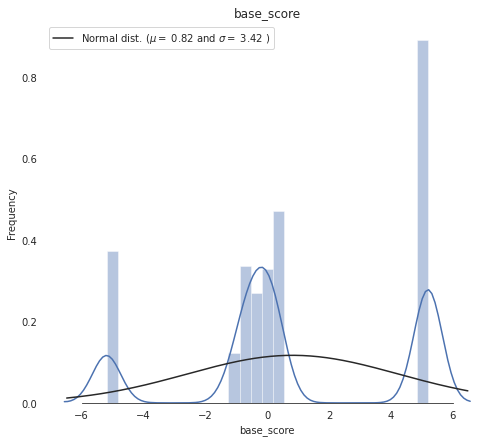

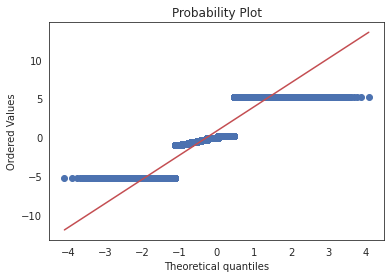


Chi-squared statistic = 3466.260, p = 0.000

The transformed data does not look Gaussian (reject the null hypothesis)


In [0]:
from sklearn.preprocessing import  PowerTransformer,QuantileTransformer
rng = np.random.RandomState(24546)
qt =  PowerTransformer()
X = df.effectiveness_rating.values.reshape(-1,1)
X = qt.fit_transform(X)
qt1 = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)
X = qt1.fit_transform(X)
print('this is done')
df['effectiveness_rating'] = pd.Series(X.reshape(1,-1)[0])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(X, fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="base_score")
ax.set(title="base_score")
sns.despine(trim=True, left=True)
plt.show()

from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
X = X.reshape(1,-1)[0]
res = stats.probplot(X, plot=plt)
plt.show()

k2, p = stats.normaltest(X)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian (fails to reject the null hypothesis)')
else:
    print('\nThe transformed data does not look Gaussian (reject the null hypothesis)')

this is done

 mu = -0.00 and sigma = 1.00



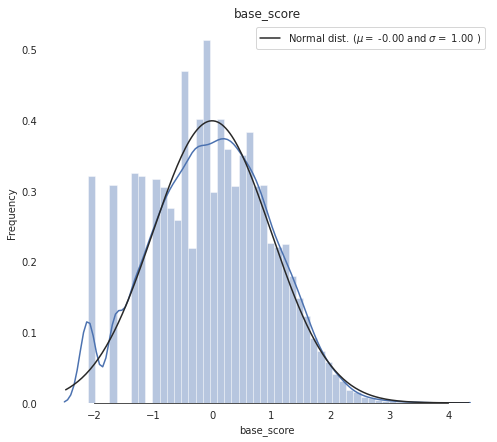

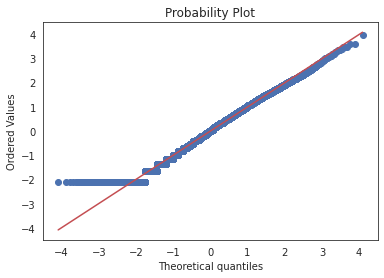


Chi-squared statistic = 304.562, p = 0.000

The transformed data does not look Gaussian (reject the null hypothesis)


In [0]:
from sklearn.preprocessing import  PowerTransformer,QuantileTransformer
rng = np.random.RandomState(24546)
qt =  PowerTransformer()
X = df.number_of_times_prescribed.values.reshape(-1,1)
#X = qt.fit_transform(X)
qt1 = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)
X = qt.fit_transform(X)
print('this is done')
df['number_of_times_prescribed'] = pd.Series(X.reshape(1,-1)[0])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(X, fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="base_score")
ax.set(title="base_score")
sns.despine(trim=True, left=True)
plt.show()

from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
X = X.reshape(1,-1)[0]
res = stats.probplot(X, plot=plt)
plt.show()

k2, p = stats.normaltest(X)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian (fails to reject the null hypothesis)')
else:
    print('\nThe transformed data does not look Gaussian (reject the null hypothesis)')

In [0]:
df.name_of_drug.unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Benzamycin', 'Midamor',
       'Didrex'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.name_of_drug.unique())
X = le.transform(df.name_of_drug.values)
print('this is done')
df['name_of_drug'] = pd.Series(X)

this is done


In [0]:
X

array([2072,  923, 1212, ..., 2091,  851, 1493])

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.use_case_for_drug.unique())
X = le.transform(df.use_case_for_drug.values)
print('this is done')
df['use_case_for_drug'] = pd.Series(X)

this is done


In [0]:
df

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",0.243504,0.451782,0.757254
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",-0.118323,2.360086,0.632244
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",-0.602120,0.063449,-0.366994
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",0.243504,0.730172,-0.127849
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",-1.013919,0.866803,-0.585413
...,...,...,...,...,...,...
32160,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",0.243504,1.562625,0.108212
32161,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",-0.474322,-2.101707,-5.199338
32162,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",0.243504,0.385470,-0.460314
32163,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",-0.118323,0.276815,0.725118


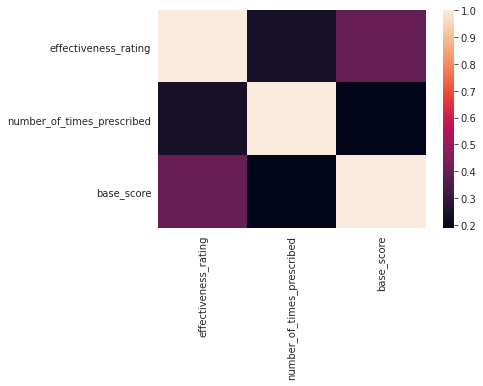

In [0]:
sns.heatmap(df.corr())

In [0]:
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(24546)
qt =  StandardScaler()
X = df.name_of_drug.values.reshape(-1,1)
X = qt.fit_transform(X)
qt1 = StandardScaler()
X = qt1.fit_transform(X)
print('this is done')
df['name_of_drug'] = pd.Series(X.reshape(1,-1)[0])

In [0]:
df

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",0.243504,0.451782,0.757254
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",-0.118323,2.360086,0.632244
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",-0.602120,0.063449,-0.366994
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",0.243504,0.730172,-0.127849
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",-1.013919,0.866803,-0.585413
...,...,...,...,...,...,...
32160,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",0.243504,1.562625,0.108212
32161,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",-0.474322,-2.101707,-5.199338
32162,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",0.243504,0.385470,-0.460314
32163,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",-0.118323,0.276815,0.725118


In [0]:
from sklearn.preprocessing import MinMaxScaler
rng = np.random.RandomState(24546)
qt =  MinMaxScaler()
X = df.use_case_for_drug.values.reshape(-1,1)
X = qt.fit_transform(X)
qt1 = MinMaxScaler()
X = qt1.fit_transform(X)
print('this is done')
df['use_case_for_drug'] = pd.Series(X.reshape(1,-1)[0])

this is done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
